Using dataset at: /Users/jinsyl/ML Class/drug_disintegration_ml/data/raw/final_data_all_excipients.csv
🔹 RF – RMSE: 24.45, R² Score: 0.672
Best RF params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
✅ Tuned RF – RMSE: 25.42, R² Score: 0.645
🔹 GBR – RMSE: 28.37, R²: 0.558
🔹 Ridge – RMSE: 36.73, R²: 0.259
Saved tuned model to: models/best_rf_model.joblib


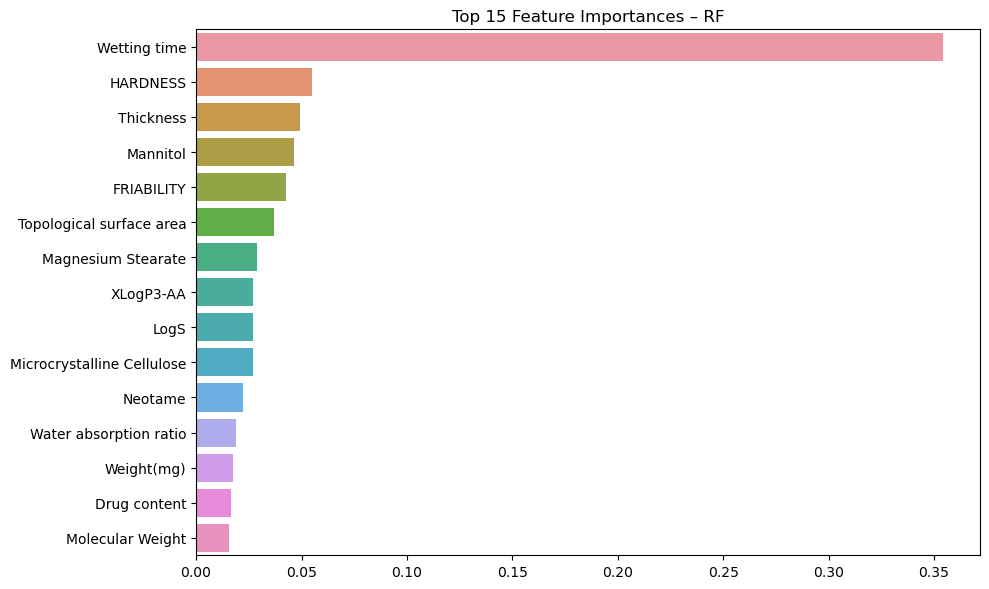

In [4]:
# 📦 1. Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# 📂 2. Load Dataset
file_path = "/Users/jinsyl/ML Class/drug_disintegration_ml/data/raw/final_data_all_excipients.csv"
print("Using dataset at:", file_path)
df = pd.read_csv(file_path)

# ⚙️ 3. Define Features & Target
X = df.drop(columns=['DISINTEGRATION_TIME'])
y = df['DISINTEGRATION_TIME']

# 🔍 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🧪 5. Baseline Model: Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 🧠 6. Model Evaluation: RF
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"🔹 RF – RMSE: {rmse_rf:.2f}, R² Score: {r2_rf:.3f}")

# ⚙️ 7. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [ 10, 20,30],
    'min_samples_split': [3, 5,7],
    'min_samples_leaf': [1,5,10]
}
gs = GridSearchCV(RandomForestRegressor(random_state=42),
                  param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs.fit(X_train, y_train)
best_rf = gs.best_estimator_
print("Best RF params:", gs.best_params_)

y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"✅ Tuned RF – RMSE: {rmse_best_rf:.2f}, R² Score: {r2_best_rf:.3f}")

# 🌱 8. Compare with Gradient Boosting & Ridge Regression
models = {
    'GBR': GradientBoostingRegressor(random_state=42),
    'Ridge': Ridge()
}
results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }
    print(f"🔹 {name} – RMSE: {results[name]['RMSE']:.2f}, R²: {results[name]['R2']:.3f}")

# 📊 9. Feature Importance (Best RF)
feat_imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.iloc[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances – RF")
plt.tight_layout()

# 💾 10. Export Final Model
model_path = os.path.join("models", "best_rf_model.joblib")
os.makedirs("models", exist_ok=True)
joblib.dump(best_rf, model_path)
print("Saved tuned model to:", model_path)
